<a href="https://colab.research.google.com/github/ZXdhruvZX/21BDS0223_Explorartory_Data_Analysis/blob/main/21BDS0223_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis Digital Assignment**

Name-Dhruv Sharma

Reg no-21BDS0223

**Github Repo Link-**

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
fertility_df = pd.read_csv("Fertility2.csv")

In [4]:
# Step 1: Basic Exploration
print("Dataset Dimensions:", fertility_df.shape)
print("\nColumn Information:\n", fertility_df.info())
print("\nFirst Five Rows:\n", fertility_df.head())
print("\nSummary Statistics:\n", fertility_df.describe(include='all'))

Dataset Dimensions: (30000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  30000 non-null  int64 
 1   morekids  30000 non-null  object
 2   gender1   30000 non-null  object
 3   gender2   30000 non-null  object
 4   age       30000 non-null  int64 
 5   afam      30000 non-null  object
 6   hispanic  30000 non-null  object
 7   other     30000 non-null  object
 8   work      30000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.1+ MB

Column Information:
 None

First Five Rows:
    rownames morekids gender1 gender2  age afam hispanic other  work
0         1       no  female  female   35   no       no    no    40
1         2       no  female    male   33   no       no    no    52
2         3       no  female  female   28   no       no    no    12
3         4       no    male    male   28   no       no    no     0
4      

In [5]:
# Step 2: Handle Missing Data (check and report)
missing_values = fertility_df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 rownames    0
morekids    0
gender1     0
gender2     0
age         0
afam        0
hispanic    0
other       0
work        0
dtype: int64


In [6]:
# Step 3: Data Cleaning
# Handle duplicates
duplicates_count = fertility_df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates_count)
fertility_df.drop_duplicates(inplace=True)


Number of Duplicate Rows: 0


In [7]:
# Replace 'yes'/'no' with 1/0 in binary columns
binary_columns = ['morekids', 'afam', 'hispanic', 'other']
for col in binary_columns:
    fertility_df[col] = fertility_df[col].replace({'yes': 1, 'no': 0})

<ipython-input-7-6e1ad38d6920>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fertility_df[col] = fertility_df[col].replace({'yes': 1, 'no': 0})


In [8]:
# Step 4: Data Transformation
# Discretize 'age' into bins
fertility_df['age_group'] = pd.cut(fertility_df['age'], bins=[20, 25, 30, 35], labels=['21-25', '26-30', '31-35'])

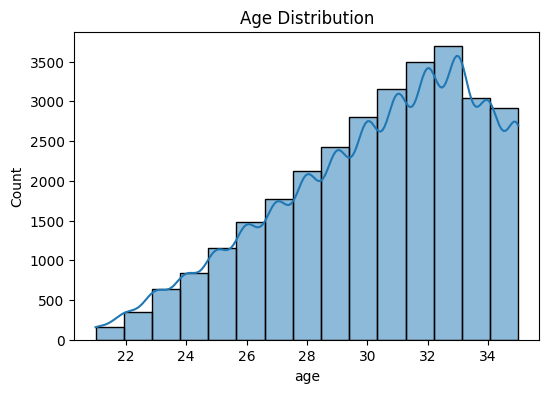

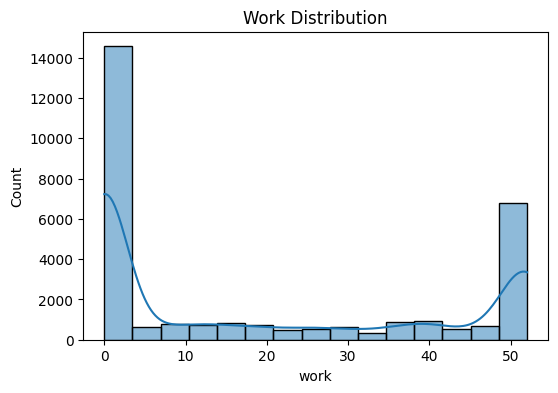

In [9]:
# Step 5: Univariate Analysis
# Plot distributions for numerical variables
numerical_cols = ['age', 'work']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(fertility_df[col], bins=15, kde=True)
    plt.title(f'{col.capitalize()} Distribution')
    plt.show()

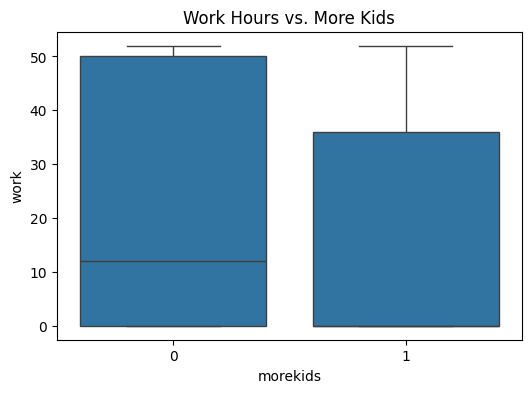

In [10]:
# Step 6: Bivariate Analysis
# Relationship between 'work' hours and 'morekids'
plt.figure(figsize=(6, 4))
sns.boxplot(x='morekids', y='work', data=fertility_df)
plt.title('Work Hours vs. More Kids')
plt.show()

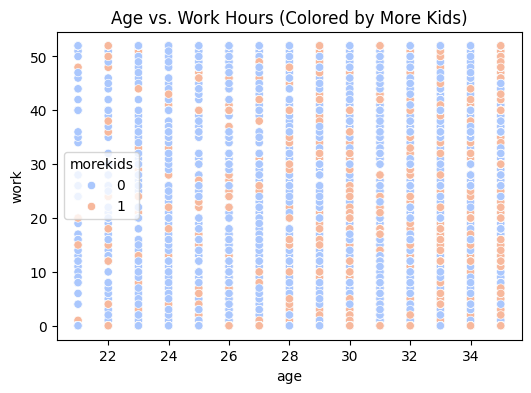

In [11]:
# Age vs. Work hours colored by 'morekids'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='work', hue='morekids', data=fertility_df, palette='coolwarm')
plt.title('Age vs. Work Hours (Colored by More Kids)')
plt.show()

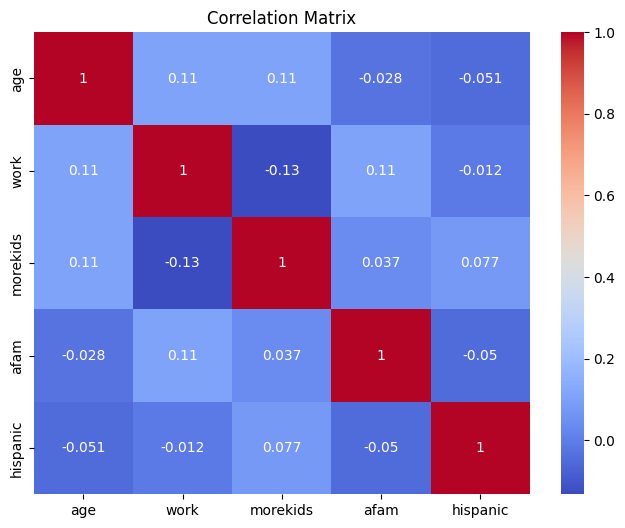

In [12]:
# Step 7: Multivariate Analysis
# Correlation matrix for numerical variables
correlation_matrix = fertility_df[['age', 'work', 'morekids', 'afam', 'hispanic']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

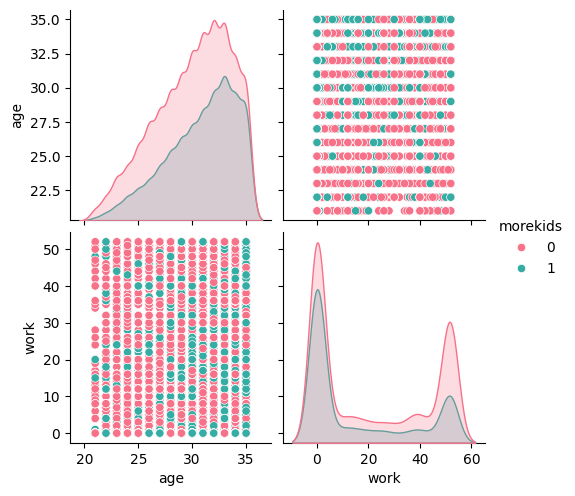

In [13]:
# Pair plot for numerical features colored by 'morekids'
sns.pairplot(fertility_df[['age', 'work', 'morekids']], hue='morekids', palette='husl')
plt.show()

In [14]:
# Step 8: Grouped Analysis (example: average work hours by ethnicity)
grouped_ethnicity = fertility_df.groupby(['afam', 'hispanic', 'other'])['work'].mean().reset_index()
print("\nAverage Work Hours by Ethnicity:\n", grouped_ethnicity)


Average Work Hours by Ethnicity:
    afam  hispanic  other       work
0     0         0      0  18.559376
1     0         0      1  22.903822
2     0         1      0  17.691896
3     0         1      1  18.873602
4     1         0      0  29.191964
5     1         1      0  23.966667


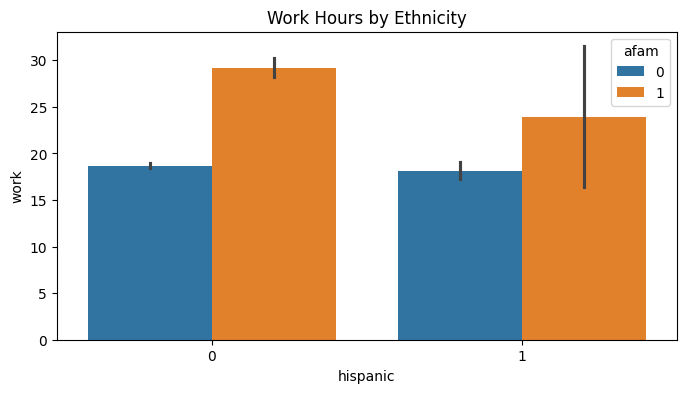

In [15]:
# Visualize grouped data
plt.figure(figsize=(8, 4))
sns.barplot(x='hispanic', y='work', hue='afam', data=fertility_df)
plt.title('Work Hours by Ethnicity')
plt.show()

# **Data Transformation**

In [16]:
# Step 1: Deduplication - Identify and remove duplicate records
initial_row_count = fertility_df.shape[0]
fertility_df.drop_duplicates(inplace=True)
deduplicated_row_count = fertility_df.shape[0]

# Step 2: Replacing values - replace 'yes'/'no' with 1/0 for binary columns
binary_columns = ['morekids', 'afam', 'hispanic', 'other']
fertility_df[binary_columns] = fertility_df[binary_columns].replace({'yes': 1, 'no': 0})

# Step 3: Discretization/Binning - bin 'age' into categories
fertility_df['age_group'] = pd.cut(fertility_df['age'], bins=[20, 25, 30, 35], labels=['21-25', '26-30', '31-35'])

# Display the first few rows to verify the transformations
initial_row_count, deduplicated_row_count, fertility_df.head()


(30000,
 30000,
    rownames  morekids gender1 gender2  age  afam  hispanic  other  work  \
 0         1         0  female  female   35     0         0      0    40   
 1         2         0  female    male   33     0         0      0    52   
 2         3         0  female  female   28     0         0      0    12   
 3         4         0    male    male   28     0         0      0     0   
 4         5         0  female    male   31     0         0      0     0   
 
   age_group  
 0     31-35  
 1     31-35  
 2     26-30  
 3     26-30  
 4     31-35  )

# **Handling Missing Data**

In [17]:
# Import required libraries for missing data imputation and MLE
from sklearn.impute import SimpleImputer
from scipy.optimize import minimize

# Step 1: Handle Missing Data using SimpleImputer
# (First, we simulate some missing data for demonstration purposes)
fertility_df_missing = fertility_df.copy()
fertility_df_missing.loc[5:10, 'work'] = np.nan  # Introduce some NaNs in 'work'

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
fertility_df_missing['work'] = imputer.fit_transform(fertility_df_missing[['work']])

# Verify that there are no missing values in 'work'
missing_after_imputation = fertility_df_missing['work'].isnull().sum()

# Step 2: Implement MLE (Maximum Likelihood Estimation)
# For demonstration, we'll perform MLE to estimate the mean of the 'work' variable.
def negative_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    likelihood = -np.sum(np.log((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(data - mu)**2 / (2 * sigma**2))))
    return -likelihood  # Return negative because 'minimize' minimizes

# Initial guesses for mean and standard deviation
initial_params = [fertility_df_missing['work'].mean(), fertility_df_missing['work'].std()]

# Perform optimization to find MLE
result = minimize(negative_log_likelihood, initial_params, args=(fertility_df_missing['work'],),
                  bounds=[(0, None), (0.1, None)])  # Ensure positive standard deviation

# Extract the estimated parameters
mle_estimated_mean, mle_estimated_std = result.x

missing_after_imputation, mle_estimated_mean, mle_estimated_std


(0, 0.0, 6848499.213498639)

# **Correlation Analysis and Time Series**

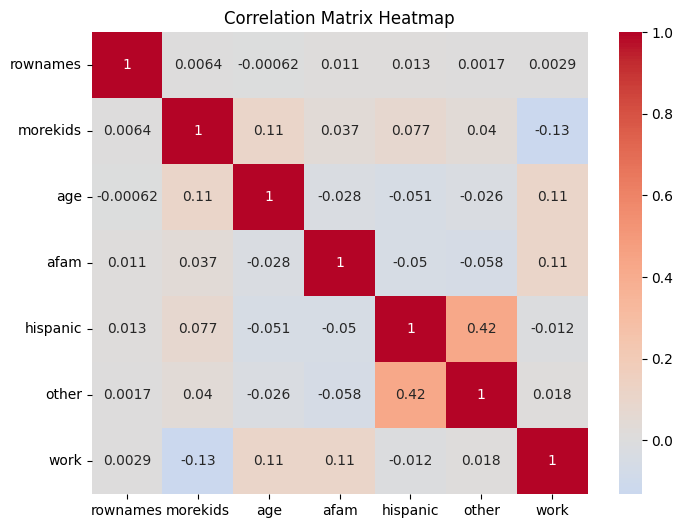

In [19]:
# Select only numeric columns for correlation
numeric_df = fertility_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


# **Data Summarization and Visualization**

Summary Statistics:
           rownames      morekids           age          afam      hispanic  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      0.377600     30.354267      0.053267      0.074400   
std     8660.398374      0.484795      3.383432      0.224568      0.262425   
min        1.000000      0.000000     21.000000      0.000000      0.000000   
25%     7500.750000      0.000000     28.000000      0.000000      0.000000   
50%    15000.500000      0.000000     31.000000      0.000000      0.000000   
75%    22500.250000      1.000000     33.000000      0.000000      0.000000   
max    30000.000000      1.000000     35.000000      1.000000      1.000000   

              other          work  
count  30000.000000  30000.000000  
mean       0.056833     19.209500  
std        0.231528     21.941018  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      6.000000  
75%        0.000

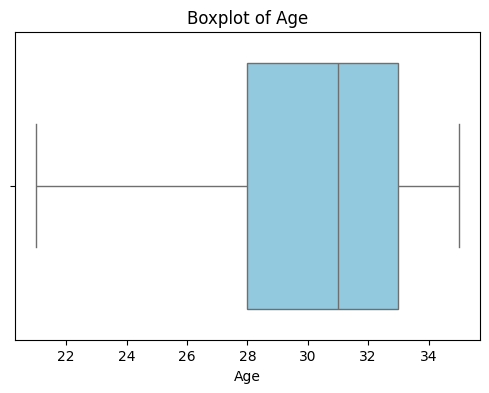

<ipython-input-20-b1fdbae67d17>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender1', y='work', data=fertility_df, ci=None, palette='viridis')
<ipython-input-20-b1fdbae67d17>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender1', y='work', data=fertility_df, ci=None, palette='viridis')


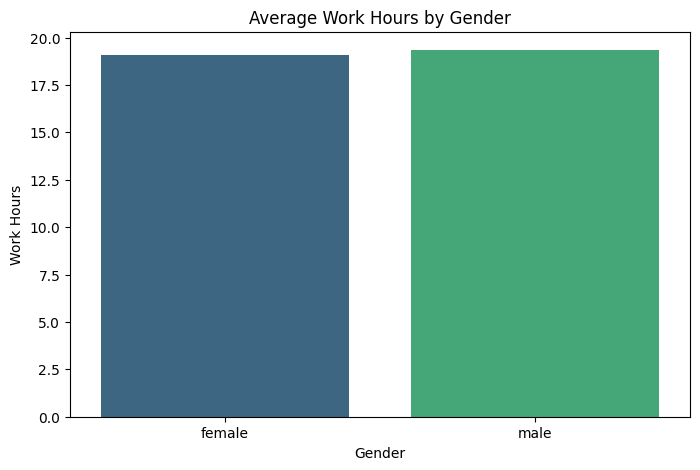


Contingency Table between 'morekids' and 'gender1':
gender1   female  male
morekids              
0           9026  9646
1           5523  5805

Chi-Square Test Results:
Chi-Square Statistic: 0.47091501583342765
P-value: 0.49256651941583895



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


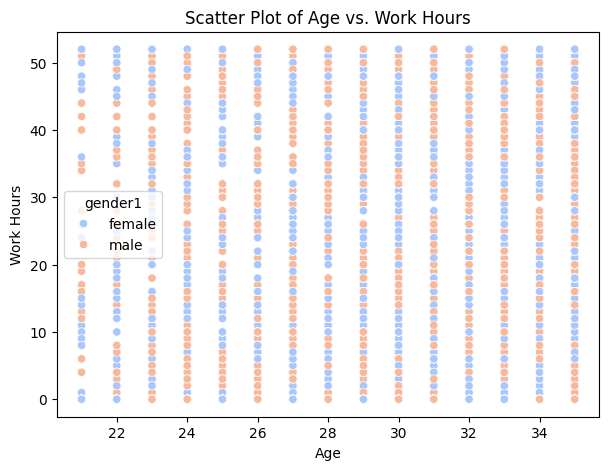

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: Statistical Summaries
# Summary statistics for the entire dataset
summary_stats = fertility_df.describe()

# Display basic summary statistics
print("Summary Statistics:")
print(summary_stats)

# Step 2: 1-D and 2-D Statistical Analysis
# 1-D: Boxplot for the 'age' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=fertility_df['age'], color='skyblue')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# 2-D: Barplot for 'work' vs. 'gender1'
plt.figure(figsize=(8, 5))
sns.barplot(x='gender1', y='work', data=fertility_df, ci=None, palette='viridis')
plt.title('Average Work Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Work Hours')
plt.show()

# Step 3: Contingency Tables and Chi-Square Test
# Create a contingency table between 'morekids' and 'gender1'
contingency_table = pd.crosstab(fertility_df['morekids'], fertility_df['gender1'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("\nContingency Table between 'morekids' and 'gender1':")
print(contingency_table)
print(f"\nChi-Square Test Results:\nChi-Square Statistic: {chi2_stat}\nP-value: {p_val}\n")

# Step 4: Scatter Plot (Age vs. Work Hours)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='work', hue='gender1', data=fertility_df, palette='coolwarm')
plt.title('Scatter Plot of Age vs. Work Hours')
plt.xlabel('Age')
plt.ylabel('Work Hours')
plt.show()


# **Clustering Algorithms**

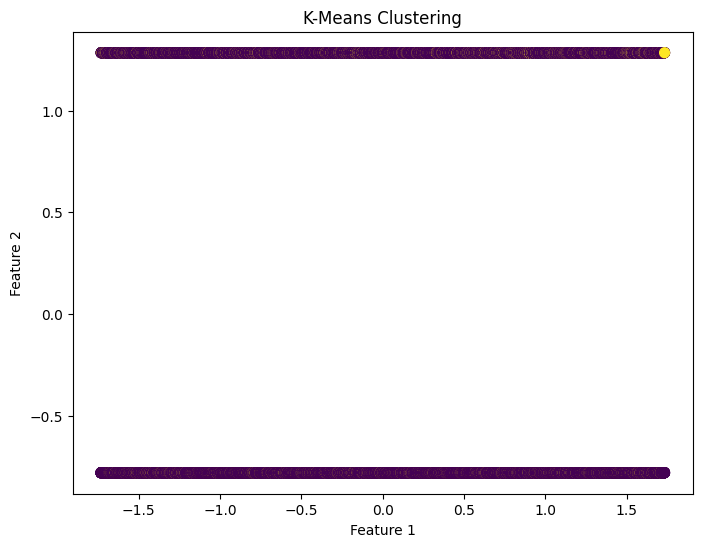

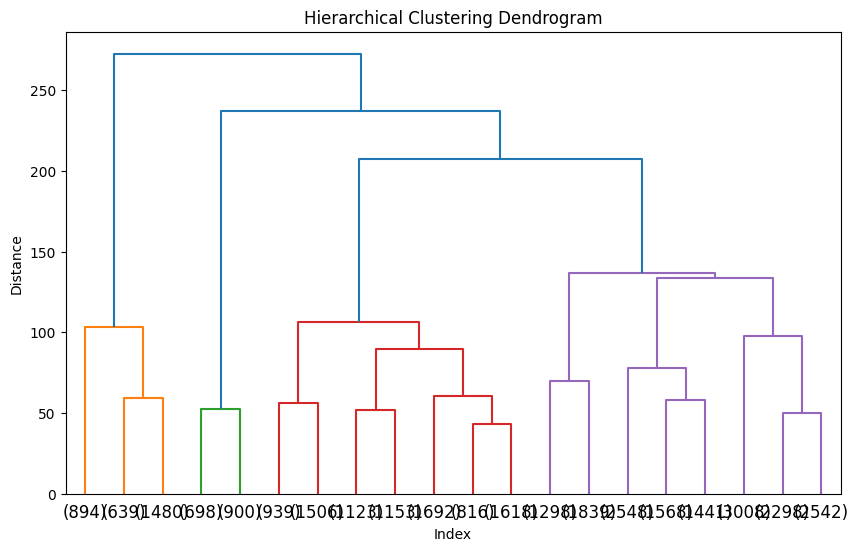

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


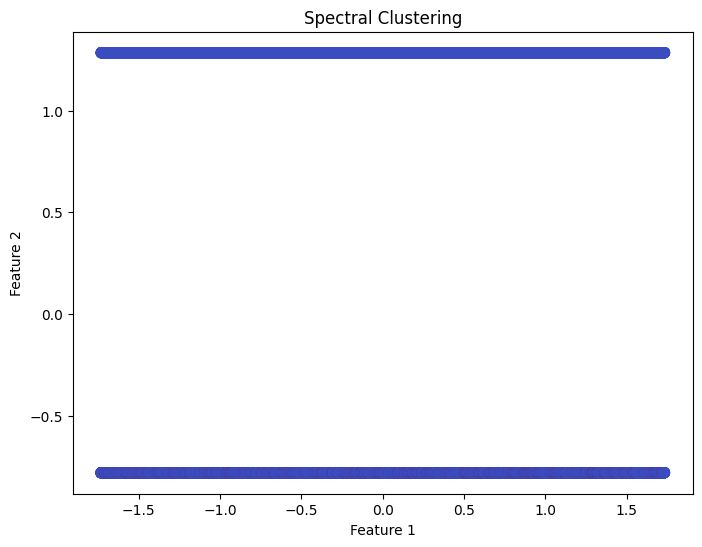

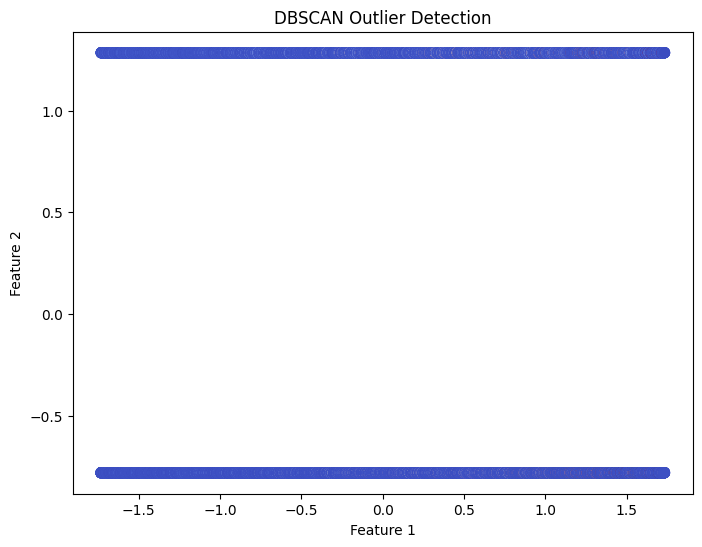

In [22]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: K-Means Clustering
# Select numeric columns for clustering (remove non-numeric columns)
numeric_data = fertility_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply KMeans clustering (reduce to 2 clusters for faster execution)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Visualizing the clusters (using only first two dimensions for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 2: Hierarchical Clustering (Dendrogram)
# Reduce dimensionality using PCA for faster hierarchical clustering
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_data)

# Perform hierarchical clustering on reduced data
Z = linkage(reduced_data, method='ward')

# Plot a subset of the dendrogram to reduce plotting time
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=20)  # 'p' limits the number of clusters shown
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# Step 3: Spectral Clustering
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering (Reduce the number of clusters for faster execution)
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_clustering.fit_predict(scaled_data)

# Visualize Spectral Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=spectral_labels, cmap='coolwarm', s=50)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 4: Outlier Detection using DBSCAN
# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Reduce eps for better clustering
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualize DBSCAN results (Outliers are labeled as -1)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='coolwarm', s=50)
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **Dimensionality Reduction**

In [30]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f3cb96adeca5cb872763b0644a04f7a973300a913db78b5f1fad291b59c4aa8d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


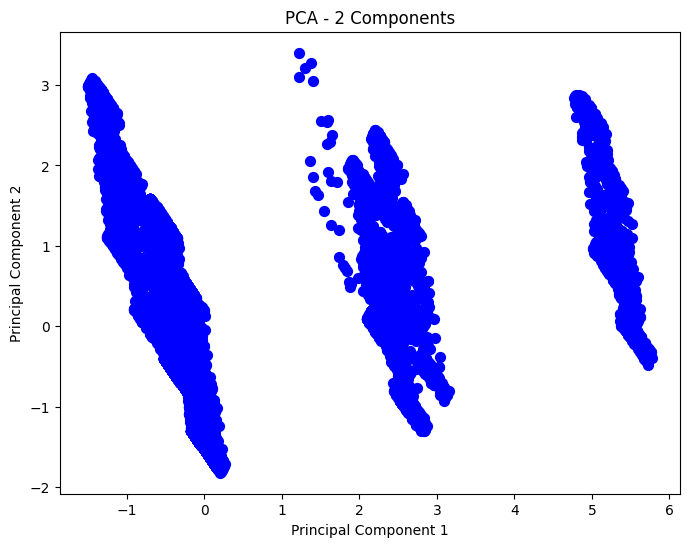

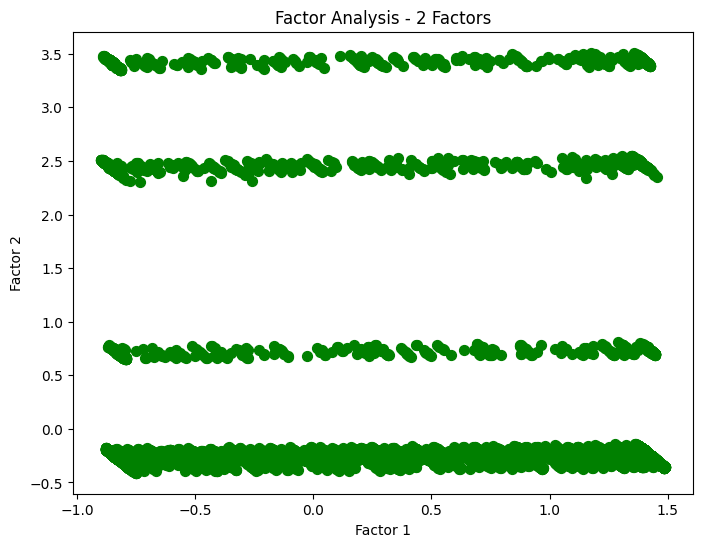

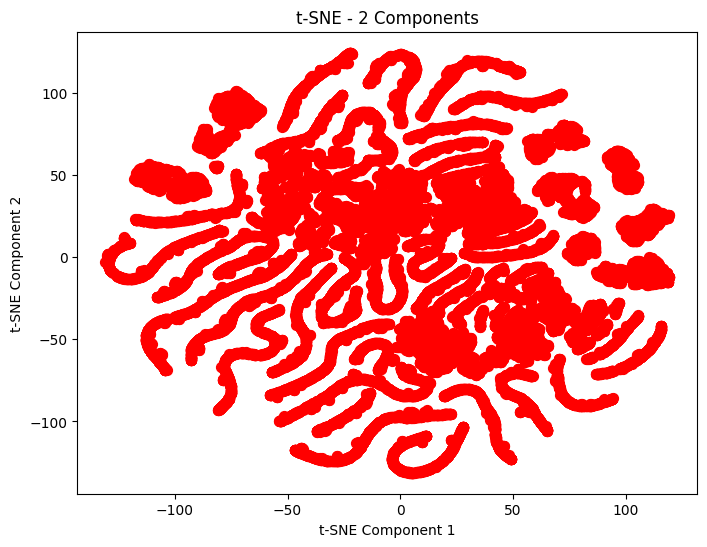

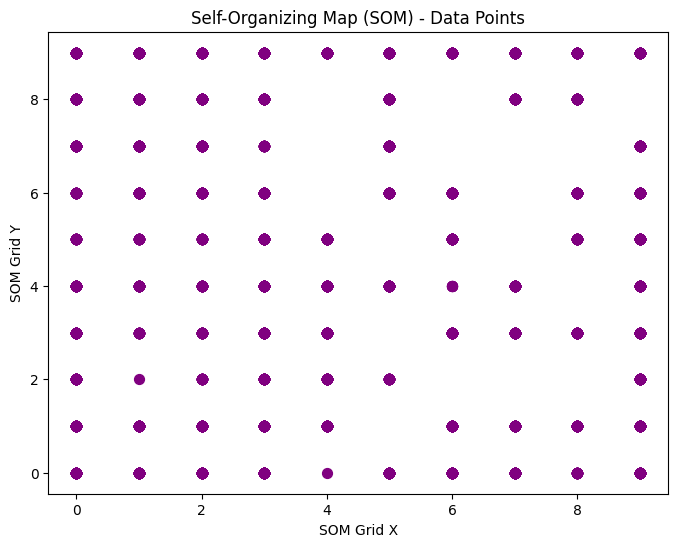

In [31]:
# Import necessary libraries
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import TSNE
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
numeric_data = fertility_df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 2: PCA (Principal Component Analysis)
# Apply PCA to reduce the dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', s=50)
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 3: Factor Analysis
# Apply Factor Analysis (reduce to 2 factors)
factor_analysis = FactorAnalysis(n_components=2)
fa_result = factor_analysis.fit_transform(scaled_data)

# Plot the results of Factor Analysis
plt.figure(figsize=(8, 6))
plt.scatter(fa_result[:, 0], fa_result[:, 1], c='green', s=50)
plt.title('Factor Analysis - 2 Factors')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

# Step 4: Manifold Learning (t-SNE for non-linear dimensionality reduction)
# Apply t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Plot the results of t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', s=50)
plt.title('t-SNE - 2 Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Step 5: Self-Organizing Maps (SOM)
# Apply SOM with a 10x10 grid (you can adjust the grid size based on the dataset size)
som = MiniSom(x=10, y=10, input_len=scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
som.train(scaled_data, 1000)  # Training for 1000 iterations

# Get the SOM map's coordinates for each data point
som_result = np.array([som.winner(x) for x in scaled_data])

# Visualize the SOM result by plotting the 2D grid and coloring it by clusters
plt.figure(figsize=(8, 6))
plt.scatter(som_result[:, 0], som_result[:, 1], c='purple', s=50)
plt.title('Self-Organizing Map (SOM) - Data Points')
plt.xlabel('SOM Grid X')
plt.ylabel('SOM Grid Y')
plt.show()


# **Model Development and Evaluation**

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import gym
import random

# Step 1: Linear Regression - Build and assess the model
# Let's assume 'fertility_df' has some numerical features and target variable 'morekids'

# Preprocessing: select features and target
X = fertility_df[['age', 'afam', 'hispanic', 'other']]  # Example features
y = fertility_df['morekids']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Step 2: Accuracy Metrics (RMSE, MAE)
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# R2 score for linear regression
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Linear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Step 3: Reinforcement Learning (RL) - Basic Setup using OpenAI Gym
# Set up a simple environment for RL. Let's use a pre-defined Gym environment.
env = gym.make("CartPole-v1")  # CartPole is a simple RL task

# Initialize variables for training
total_episodes = 10
total_rewards = []

for episode in range(total_episodes):
    state = env.reset()  # Reset environment to initial state
    done = False
    total_reward = 0

    while not done:
        # Random action selection (for simplicity)
        action = env.action_space.sample()

        # Step through the environment
        next_state, reward, done, info = env.step(action)

        # Accumulate reward
        total_reward += reward
        state = next_state  # Update state

    total_rewards.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward: {total_reward}")

# Output average reward after training
print(f"Average Reward over {total_episodes} episodes: {np.mean(total_rewards):.3f}")


Linear Regression Results:
R² Score: 0.018
RMSE: 0.482
MAE: 0.462
Episode 1: Total Reward: 26.0
Episode 2: Total Reward: 15.0
Episode 3: Total Reward: 36.0
Episode 4: Total Reward: 15.0
Episode 5: Total Reward: 16.0
Episode 6: Total Reward: 23.0
Episode 7: Total Reward: 37.0
Episode 8: Total Reward: 19.0
Episode 9: Total Reward: 21.0
Episode 10: Total Reward: 17.0
Average Reward over 10 episodes: 22.500


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


# **Machine Learning Techniques**

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Step 1: Load and prepare the data
# Let's assume 'fertility_df' has a target variable 'morekids' (binary classification task)
# Select relevant features for classification
X = fertility_df[['age', 'afam', 'hispanic', 'other']]  # Example features
y = fertility_df['morekids']  # Target variable (binary)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Logistic Regression
# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.3f}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# Step 3: Decision Tree Classifier
# Initialize and train the decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Step 4: Support Vector Machine (SVM)
# Initialize and train the SVM model
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate SVM
print("\nSupport Vector Machine (SVM):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# Step 5: Random Forest Classifier
# Initialize and train the random forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Step 6: Gradient Boosting Classifier
# Initialize and train the gradient boosting model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# Step 7: XGBoost (Gradient Boosting with XGBoost)
# Initialize and train the XGBoost model
xg_classifier = xgb.XGBClassifier(random_state=42)
xg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xg_classifier.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xg):.3f}")
print(classification_report(y_test, y_pred_xg))
print(confusion_matrix(y_test, y_pred_xg))


Logistic Regression:
Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      3707
           1       0.57      0.08      0.14      2293

    accuracy                           0.62      6000
   macro avg       0.60      0.52      0.45      6000
weighted avg       0.60      0.62      0.52      6000

[[3564  143]
 [2107  186]]

Decision Tree Classifier:
Accuracy: 0.624
              precision    recall  f1-score   support

           0       0.63      0.97      0.76      3707
           1       0.56      0.07      0.12      2293

    accuracy                           0.62      6000
   macro avg       0.59      0.52      0.44      6000
weighted avg       0.60      0.62      0.52      6000

[[3584  123]
 [2135  158]]

Support Vector Machine (SVM):
Accuracy: 0.618
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      3707
           1       0.00      0.00      0.00      2293

 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Classifier:
Accuracy: 0.624
              precision    recall  f1-score   support

           0       0.63      0.97      0.76      3707
           1       0.56      0.07      0.12      2293

    accuracy                           0.62      6000
   macro avg       0.59      0.52      0.44      6000
weighted avg       0.60      0.62      0.52      6000

[[3584  123]
 [2135  158]]

Gradient Boosting Classifier:
Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      3707
           1       0.58      0.08      0.14      2293

    accuracy                           0.63      6000
   macro avg       0.60      0.52      0.45      6000
weighted avg       0.61      0.63      0.52      6000

[[3577  130]
 [2117  176]]

XGBoost Classifier:
Accuracy: 0.624
              precision    recall  f1-score   support

           0       0.63      0.97      0.76      3707
           1       0.56      0.07      0.12      2293

 

# **Network Analysis**

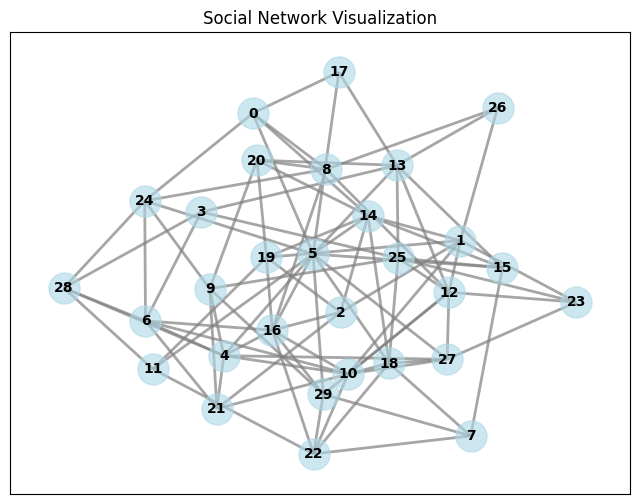

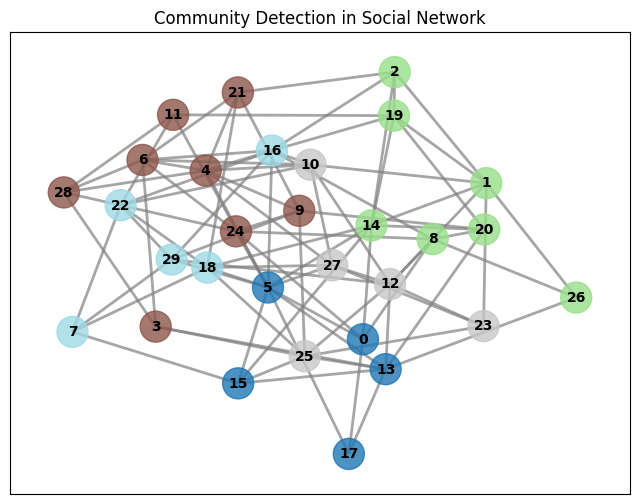

Shortest path from node 0 to node 10: [0, 5, 16, 6, 10]
Shortest path length: 9


In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community  # For Louvain community detection

# Step 1: Create a social network using networkx
G = nx.erdos_renyi_graph(30, 0.2)  # Random graph with 30 nodes and probability 0.2 for edge creation

# Step 2: Social Network Visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')
plt.title("Social Network Visualization")
plt.show()

# Step 3: Community Detection using Louvain Method (available via python-louvain)
partition = community.best_partition(G)

# Step 4: Visualizing the network with community detection
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
cmap = plt.get_cmap("tab20")
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=list(partition.values()), cmap=cmap, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')
plt.title("Community Detection in Social Network")
plt.show()

# Step 5: Graph Analysis - Apply Dijkstra’s Algorithm to find shortest path
# Add weights to the edges for Dijkstra's algorithm
for (u, v, d) in G.edges(data=True):
    d['weight'] = np.random.randint(1, 10)  # Assigning random weights to edges

# Select a source and target node for Dijkstra's algorithm
source_node = 0
target_node = 10

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.dijkstra_path_length(G, source=source_node, target=target_node, weight='weight')

print(f"Shortest path from node {source_node} to node {target_node}: {shortest_path}")
print(f"Shortest path length: {shortest_path_length}")


# **Principal Component Analysis**

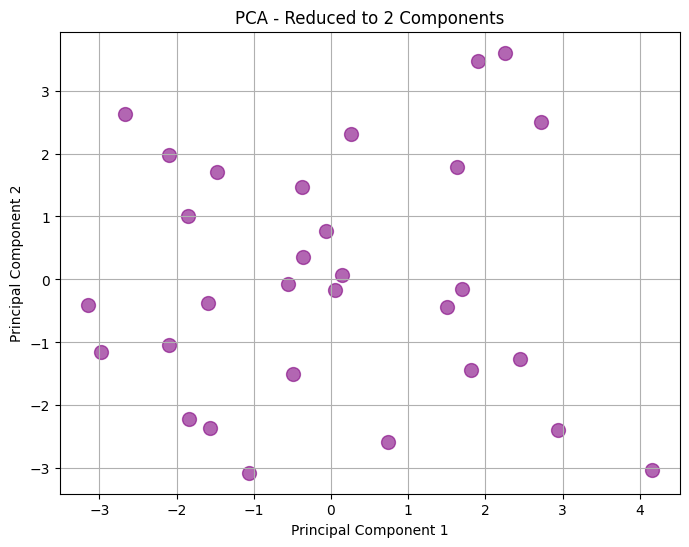

Explained Variance by Component 1: 0.1228
Explained Variance by Component 2: 0.1198


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import networkx as nx

# Step 1: Create a social network using networkx (same as before)
G = nx.erdos_renyi_graph(30, 0.2)  # Random graph with 30 nodes and probability 0.2 for edge creation

# Extract adjacency matrix as the dataset for PCA
adj_matrix = nx.to_numpy_array(G)

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(adj_matrix)

# Step 3: Apply PCA (Reducing to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 4: Visualize the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='purple', s=100, alpha=0.6)
plt.title('PCA - Reduced to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 5: Print PCA explained variance to understand how much information each component captures
print(f"Explained Variance by Component 1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Explained Variance by Component 2: {pca.explained_variance_ratio_[1]:.4f}")
